# This contains Analysis of complete data 

In [139]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [140]:
df = pd.read_csv("cleaned_data.csv")
df.head(1)

,Gender,CGPA,10th Class Board,10th Class Science Marks (out of 100),10th Class Maths Marks (out of 100),10th Class English/Language Marks (out of 100),10th Class Overall Percentage,12th Class School Category,12th Class Board,12th Class Physics Marks (out of 100),...,12th Class English/Language Marks (out of 100),12th Class Overall Percentage,JEE Mains Session 1 Maths Percentile,JEE Mains Session 1 Physics Percentile,JEE Mains Session 1 Chemistry Percentile,JEE Mains Session 1 Overall Score,JEE Mains Session 2 Maths Percentile,JEE Mains Session 2 Physics Percentile,JEE Mains Session 2 Chemistry Percentile,JEE Mains Session 2 Overall Percentile
0,Female,8.6,ICSE,83,89,86,91.8,Private School,ICSE,98.0,...,90,96.0,94.9,87.8,57.4,84.5,91.9,86.1,82.6,88.3


In [141]:
#  removing a outlier
df = df.drop(index=157)

In [134]:
numerical_cols = df.select_dtypes(include=[np.number]).columns
correlations = df[numerical_cols].corr()['CGPA'].sort_values(ascending=False)
# display(correlations)

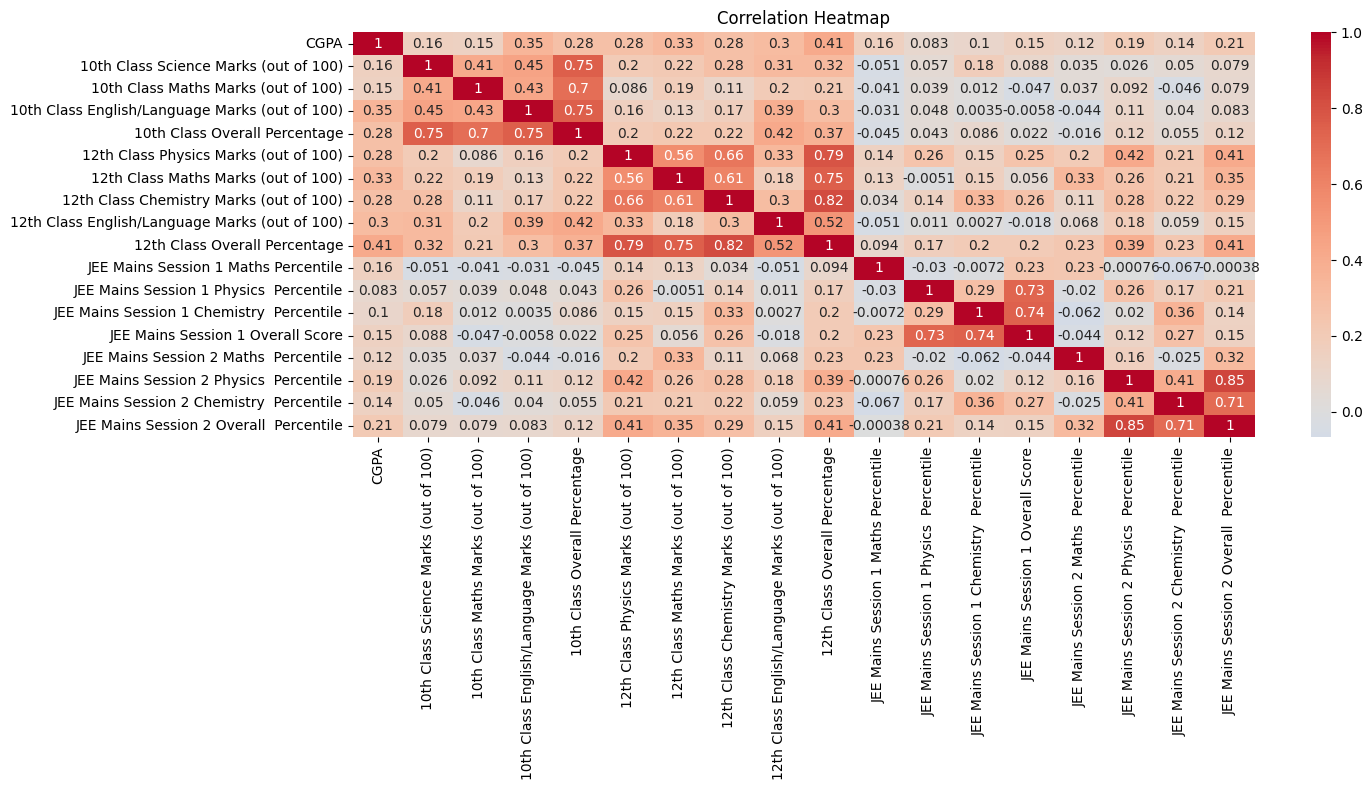

In [135]:
plt.figure(figsize=(15, 8))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

### OutComes
1. There is very less correlation with  CGPA and other features.
<br>
Therefore, we need to find another way to have a concreate or appropriate way to have better correlation.

In [124]:
df['10th_avg'] = df[['10th Class Science Marks (out of 100)', 
                        '10th Class Maths Marks (out of 100)', 
                        '10th Class English/Language Marks (out of 100)']].mean(axis=1)

df['12th_avg'] = df[['12th Class Physics Marks (out of 100)',
                        '12th Class Maths Marks (out of 100)',
                        '12th Class Chemistry Marks (out of 100)',
                        '12th Class English/Language Marks (out of 100)']].mean(axis=1)

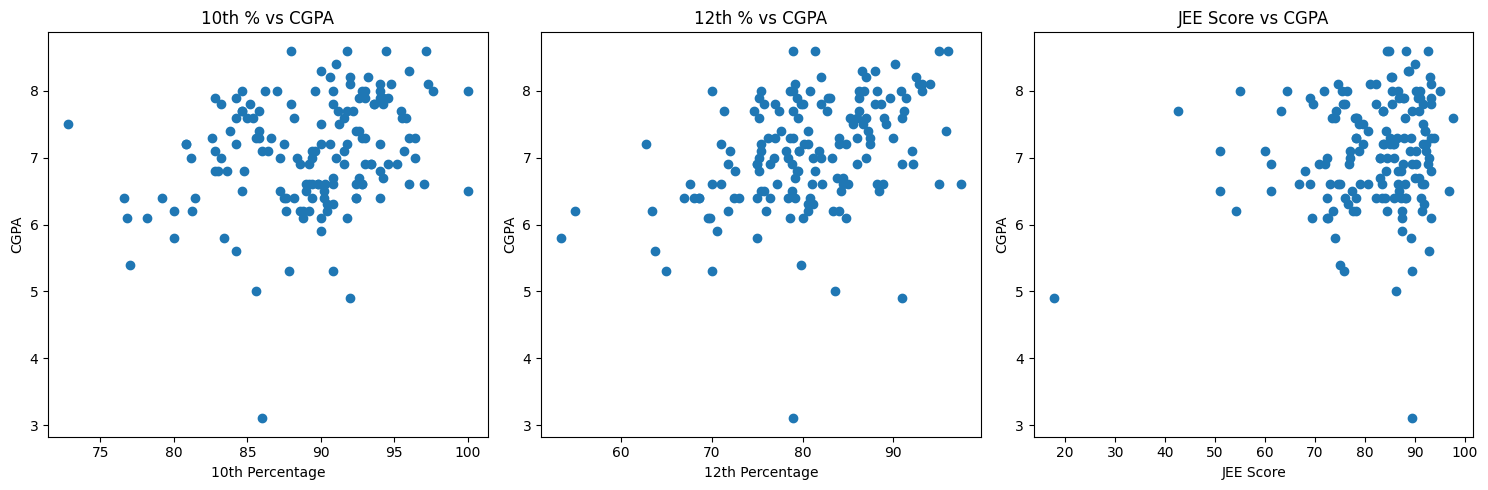

In [125]:
plt.figure(figsize=(15, 5))

plt.subplot(131)
plt.scatter(df['10th Class Overall Percentage'], df['CGPA'])
plt.title('10th % vs CGPA')
plt.xlabel('10th Percentage')
plt.ylabel('CGPA')


plt.subplot(132)
plt.scatter(df['12th Class Overall Percentage'], df['CGPA'])
plt.title('12th % vs CGPA')
plt.xlabel('12th Percentage')
plt.ylabel('CGPA')

plt.subplot(133)
plt.scatter(df['JEE Mains Session 1 Overall Score'], df['CGPA'])
plt.title('JEE Score vs CGPA')
plt.xlabel('JEE Score')
plt.ylabel('CGPA')

plt.tight_layout()
plt.show()

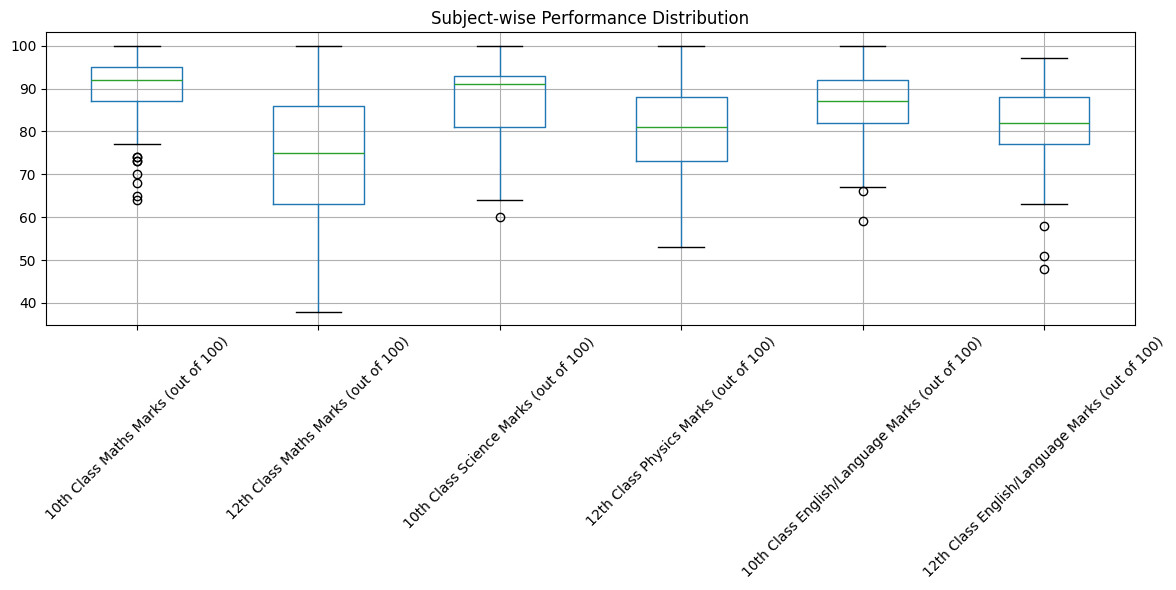

In [130]:
# Subject-wise analysis
subjects = {
    'Mathematics': ['10th Class Maths Marks (out of 100)', '12th Class Maths Marks (out of 100)'],
    'Science/Physics': ['10th Class Science Marks (out of 100)', '12th Class Physics Marks (out of 100)'],
    'English': ['10th Class English/Language Marks (out of 100)', '12th Class English/Language Marks (out of 100)']
}

# Box plots 
plt.figure(figsize=(12, 6))
df.boxplot([col for cols in subjects.values() for col in cols])
plt.xticks(rotation=45)
plt.title('Subject-wise Performance Distribution')
plt.tight_layout()
plt.show()


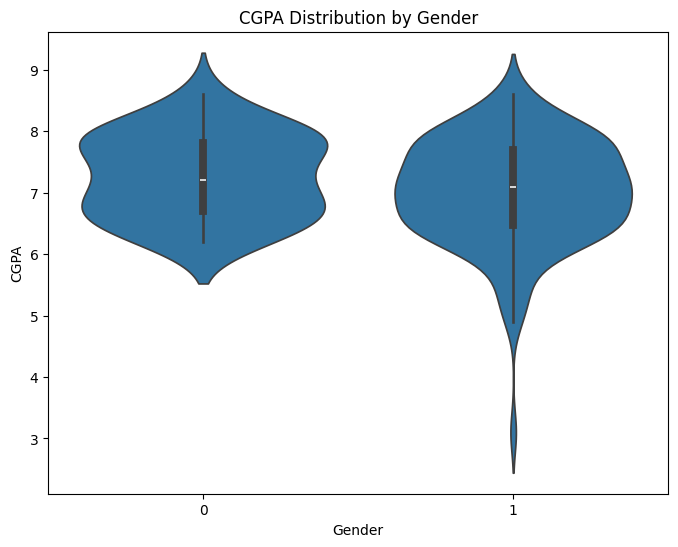

In [127]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='Gender', y='CGPA', data=df)
plt.title('CGPA Distribution by Gender')
plt.show()

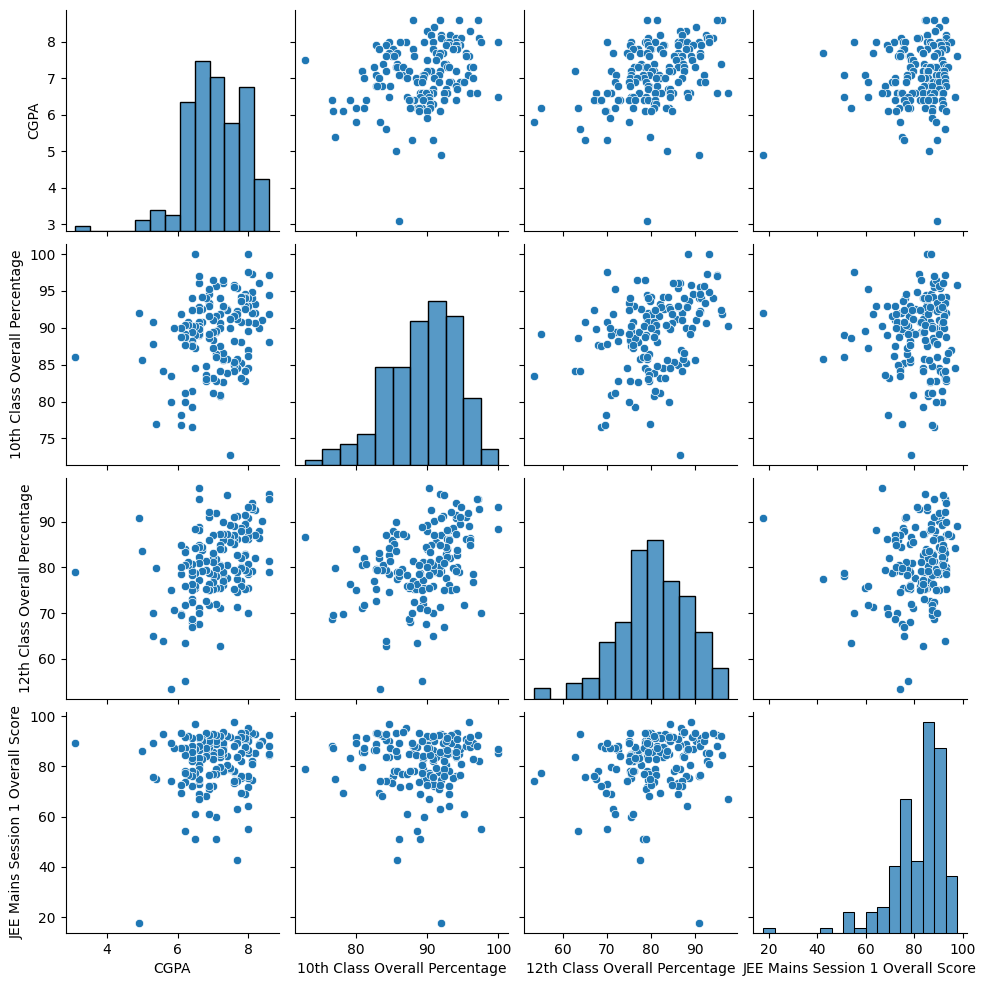

In [128]:
key_vars = ['CGPA', '10th Class Overall Percentage', '12th Class Overall Percentage', 
           'JEE Mains Session 1 Overall Score']
sns.pairplot(df[key_vars])
plt.show()

# Day 2

In [129]:
df

,Gender,CGPA,10th Class Science Marks (out of 100),10th Class Maths Marks (out of 100),10th Class English/Language Marks (out of 100),10th Class Overall Percentage,12th Class Physics Marks (out of 100),12th Class Maths Marks (out of 100),12th Class Chemistry Marks (out of 100),12th Class English/Language Marks (out of 100),...,JEE Mains Session 1 Physics Percentile,JEE Mains Session 1 Chemistry Percentile,JEE Mains Session 1 Overall Score,JEE Mains Session 2 Maths Percentile,JEE Mains Session 2 Physics Percentile,JEE Mains Session 2 Chemistry Percentile,JEE Mains Session 2 Overall Percentile,10th_avg,12th_avg,10th_12th_avg
0,0,8.6,83,89,86,91.80,98.000000,98.000000,93.000000,90,...,87.8,57.4,84.5,91.9,86.1,82.6,88.3,86.000000,94.750000,93.90
1,1,8.6,93,79,76,88.00,82.000000,81.000000,78.000000,78,...,58.3,95.7,88.2,89.9,72.6,90.6,84.7,82.666667,79.750000,84.70
2,1,8.6,95,99,84,94.40,75.000000,86.000000,72.000000,80,...,87.8,78.3,84.8,82.9,93.6,83.2,90.4,92.666667,78.250000,86.70
3,1,8.6,98,99,99,97.16,94.000000,95.000000,96.000000,91,...,93.9,88.9,92.6,78.1,93.8,86.0,90.6,98.666667,94.000000,96.08
4,1,8.4,80,95,91,91.00,95.000000,92.000000,83.000000,92,...,91.8,72.7,90.1,91.5,86.5,88.6,89.9,88.666667,90.500000,90.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,1,5.3,72,94,80,87.80,77.000000,57.000000,60.000000,70,...,92.7,90.5,89.4,91.0,94.4,96.5,96.0,82.000000,66.000000,78.90
153,1,5.3,78,97,94,90.80,64.000000,38.000000,59.000000,83,...,81.2,73.3,75.8,77.3,44.0,23.7,41.7,89.666667,61.000000,77.90
154,1,5.0,81,82,80,85.60,83.000000,79.000000,90.000000,77,...,87.3,80.4,86.3,78.2,81.5,59.5,77.2,81.000000,82.250000,84.60
155,1,4.9,100,100,90,92.00,91.666667,94.333333,96.666667,82,...,22.3,19.6,17.7,96.3,82.6,47.4,85.3,96.666667,91.166667,91.45


In [144]:
df =  df.drop(["10th Class Board","12th Class School Category","12th Class Board"], axis =1)

In [142]:
df['Gender'] = df['Gender'].replace({"Male":1,"Female":0})

C:\Users\Saksh\AppData\Local\Temp\ipykernel_29296\1668688148.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Gender'] = df['Gender'].replace({"Male":1,"Female":0})


Top Correlations with CGPA (Absolute Values):
 CGPA                                              1.000000
12th Class Overall Percentage                     0.408657
12th_avg                                          0.388634
10th Class English/Language Marks (out of 100)    0.347604
12th Class Maths Marks (out of 100)               0.327578
12th Class English/Language Marks (out of 100)    0.304187
10th Class Overall Percentage                     0.282947
12th Class Chemistry Marks (out of 100)           0.282602
12th Class Physics Marks (out of 100)             0.282561
10th_avg                                          0.275073
JEE Mains Session 2 Overall  Percentile           0.212119
JEE Mains Session 2 Physics  Percentile           0.188995
JEE Mains Session 1 Maths Percentile              0.157685
10th Class Science Marks (out of 100)             0.157467
10th Class Maths Marks (out of 100)               0.147182
JEE Mains Session 1 Overall Score                 0.145846
JEE Mains

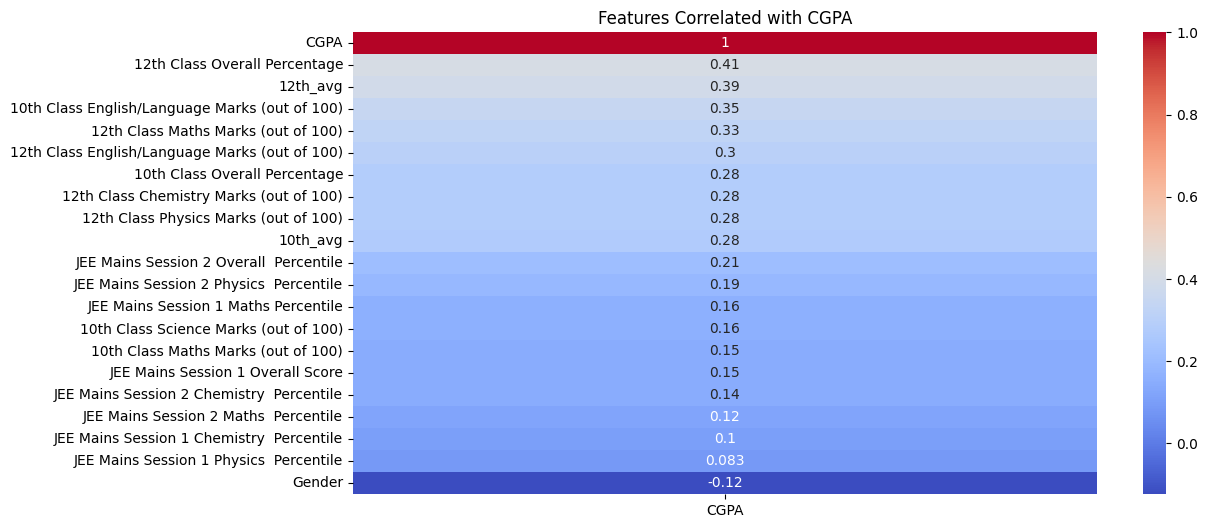


New feature correlation: 0.43022574268697383

Lasso Coefficients:
 10th Class English/Language Marks (out of 100)    0.167646
12th Class Overall Percentage                     0.147435
12th Class Maths Marks (out of 100)               0.064057
JEE Mains Session 1 Maths Percentile              0.060820
12th Class English/Language Marks (out of 100)    0.049130
JEE Mains Session 1 Overall Score                 0.022597
JEE Mains Session 2 Overall  Percentile           0.017845
dtype: float64

Random Forest Importance:
 10th_12th_avg                                     0.162569
JEE Mains Session 2 Physics  Percentile           0.148068
12th Class Overall Percentage                     0.093178
JEE Mains Session 2 Maths  Percentile             0.064788
12th Class Maths Marks (out of 100)               0.057077
JEE Mains Session 1 Maths Percentile              0.046674
12th Class English/Language Marks (out of 100)    0.042475
JEE Mains Session 1 Physics  Percentile           0.038269
12th

In [121]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

# Load your dataset
data = df  # Replace with your file path

# 1. Calculate correlations
corr_matrix = data.corr()
cgpa_corr = corr_matrix['CGPA'].abs().sort_values(ascending=False)
print("Top Correlations with CGPA (Absolute Values):\n", cgpa_corr)

# 2. Visualize correlations
plt.figure(figsize=(12, 6))
sns.heatmap(corr_matrix[['CGPA']].sort_values(by='CGPA', ascending=False), annot=True, cmap='coolwarm')
plt.title("Features Correlated with CGPA")
plt.show()

# 3. Feature engineering example
data['10th_12th_avg'] = (data['10th Class Overall Percentage'] + data['12th Class Overall Percentage']) / 2
print("\nNew feature correlation:", data['10th_12th_avg'].corr(data['CGPA']))

# 4. Lasso regression for feature selection
X = data.drop('CGPA', axis=1)
y = data['CGPA']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

lasso = Lasso(alpha=0.05)  # Adjust alpha based on data scale
lasso.fit(X_scaled, y)

lasso_coef = pd.Series(lasso.coef_, index=X.columns)
print("\nLasso Coefficients:\n", lasso_coef[lasso_coef != 0].sort_values(ascending=False))

# 5. Random Forest feature importance
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X, y)

rf_importance = pd.Series(rf.feature_importances_, index=X.columns)
print("\nRandom Forest Importance:\n", rf_importance.sort_values(ascending=False))

In [146]:
import pandas as pd

# Load your dataset
# df = pd.read_csv("cleaned_data.csv")
# Compute correlation of numerical features with CGPA
correlation_matrix = df.corr(numeric_only=True)
cgpa_correlation = correlation_matrix["CGPA"].sort_values(ascending=False)

# Display the top correlated features
# cgpa_correlation


# Feature Engineering: Creating new potential features

# 1. Average of 10th and 12th percentages
df["Avg_10th_12th_Percentage"] = (df["10th Class Overall Percentage"] + df["12th Class Overall Percentage"]) / 2

# 2. Combined Science & Maths scores (10th and 12th)
df["10th_Science_Maths_Avg"] = (df["10th Class Science Marks (out of 100)"] + df["10th Class Maths Marks (out of 100)"]) / 2
df["12th_Science_Maths_Avg"] = (df["12th Class Physics Marks (out of 100)"] + df["12th Class Maths Marks (out of 100)"] + df["12th Class Chemistry Marks (out of 100)"]) / 3

# 3. JEE performance combined (Session 1 & 2 overall percentile average)
df["JEE_Overall_Avg"] = (df["JEE Mains Session 1 Overall Score"] + df["JEE Mains Session 2 Overall  Percentile"]) / 2

# 4. Difference between JEE session scores
df["JEE_Maths_Improvement"] = df["JEE Mains Session 2 Maths  Percentile"] - df["JEE Mains Session 1 Maths Percentile"]
df["JEE_Physics_Improvement"] = df["JEE Mains Session 2 Physics  Percentile"] - df["JEE Mains Session 1 Physics  Percentile"]
df["JEE_Chemistry_Improvement"] = df["JEE Mains Session 2 Chemistry  Percentile"] - df["JEE Mains Session 1 Chemistry  Percentile"]

# Recomputing correlation with CGPA
new_correlation_matrix = df.corr(numeric_only=True)
new_cgpa_correlation = new_correlation_matrix["CGPA"].sort_values(ascending=False)

# Display the newly created feature correlations
# new_cgpa_correlation


# Create polynomial and interaction features
df["Avg_10th_12th_Percentage_Sq"] = df["Avg_10th_12th_Percentage"] ** 2
df["12th_Science_Maths_Avg_Sq"] = df["12th_Science_Maths_Avg"] ** 2
df["Interaction_10th_12th"] = df["10th Class Overall Percentage"] * df["12th Class Overall Percentage"]
df["Interaction_10thMaths_12thMaths"] = df["10th Class Maths Marks (out of 100)"] * df["12th Class Maths Marks (out of 100)"]

# Compute correlations with CGPA
correlation_matrix = df.corr()
cgpa_correlation = correlation_matrix["CGPA"].sort_values(ascending=False)

# Display new feature correlations
print(cgpa_correlation)


CGPA                                              1.000000
Avg_10th_12th_Percentage                          0.430226
Interaction_10th_12th                             0.428923
Avg_10th_12th_Percentage_Sq                       0.427378
12th Class Overall Percentage                     0.408657
12th_Science_Maths_Avg                            0.349415
10th Class English/Language Marks (out of 100)    0.347604
12th_Science_Maths_Avg_Sq                         0.343210
Interaction_10thMaths_12thMaths                   0.342045
12th Class Maths Marks (out of 100)               0.327578
12th Class English/Language Marks (out of 100)    0.304187
10th Class Overall Percentage                     0.282947
12th Class Chemistry Marks (out of 100)           0.282602
12th Class Physics Marks (out of 100)             0.282561
JEE_Overall_Avg                                   0.240234
JEE Mains Session 2 Overall  Percentile           0.212119
JEE Mains Session 2 Physics  Percentile           0.1889